In [1]:
import os,sys
import pandas as pd

In [2]:
sys.path.append("../")


In [3]:
from scripts.data_loader import load_data

df =load_data("../data/AAPL_historical_data.csv")
df =df.head(200)

df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [9]:
from scripts.data_analyzer import calculate_rsi

# Simple Moving Average over 7 days
df['SMA_7'] = df['Close'].rolling(window=7).mean()

# Exponential Moving Average over 7 days
df['EMA_7'] = df['Close'].ewm(span=7, adjust=False).mean()

# Relative Strength Index over 7 days
df['RSI_7'] = calculate_rsi(df['Close'])

#Moving Average Convergence Divergence 
short_ema = df['Close'].ewm(span=12, adjust=False).mean()
long_ema = df['Close'].ewm(span=26, adjust=False).mean()
df['MACD'] = short_ema - long_ema
df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()


df.head(20)



,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_7,EMA_7,RSI_7,MACD,Signal
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,0.128348,NaN,0.000000,0.000000
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,0.126674,NaN,-0.000534,-0.000107
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,0.123186,NaN,-0.001659,-0.000417
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,0.121268,NaN,-0.002299,-0.000793
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,0.120666,NaN,-0.002506,-0.001136
5,1980-12-19,0.126116,0.126674,0.126116,0.126116,0.097223,48630400,0.0,0.0,NaN,0.122029,NaN,-0.002062,-0.001321
6,1980-12-22,0.132254,0.132813,0.132254,0.132254,0.101954,37363200,0.0,0.0,0.122210,0.124585,55.555256,-0.001201,-0.001297
7,1980-12-23,0.137835,0.138393,0.137835,0.137835,0.106257,46950400,0.0,0.0,0.123565,0.127898,61.644213,-0.000067,-0.001051
8,1980-12-24,0.145089,0.145647,0.145089,0.145089,0.111849,48003200,0.0,0.0,0.126913,0.132195,78.377529,0.001401,-0.000561
9,1980-12-26,0.158482,0.159040,0.158482,0.158482,0.122173,55574400,0.0,0.0,0.133450,0.138767,100.000000,0.003603,0.000272


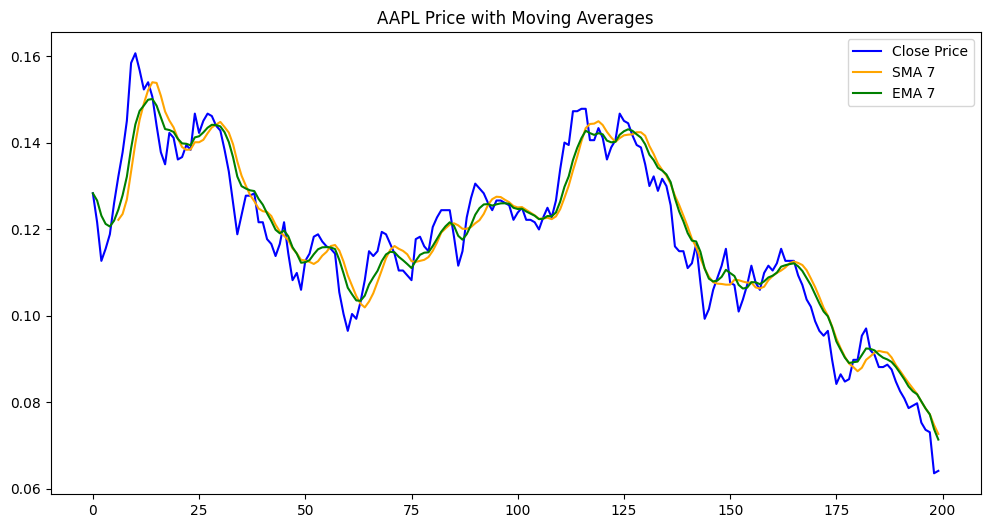

In [8]:
import matplotlib.pyplot as plt

# Plot Close Price with Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label="Close Price", color="blue")
plt.plot(df['SMA_7'], label="SMA 7", color="orange")
plt.plot(df['EMA_7'], label="EMA 7", color="green")
plt.title("AAPL Price with Moving Averages")
plt.legend()
plt.show()

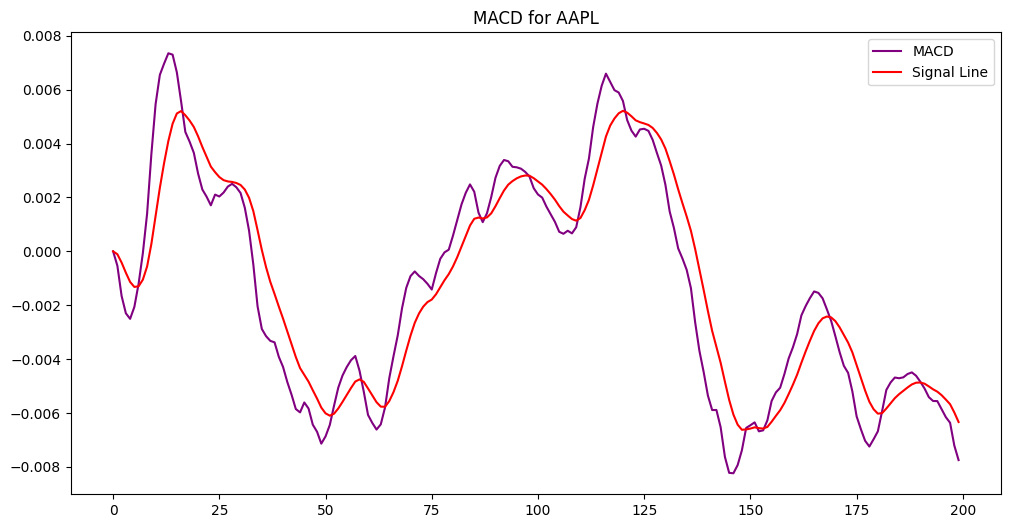

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df['MACD'], label="MACD", color="purple")
plt.plot(df['Signal'], label="Signal Line", color="red")
plt.title("MACD for AAPL")
plt.legend()
plt.show()

In [6]:

from scripts.data_analyzer import convert_mixed_datetime

df_headline =load_data("../data/raw_analyst_ratings.csv")
df_headline = df_headline.head(20000)
df_headline["date"] = df_headline["date"].apply(convert_mixed_datetime)
df_headline.head(200)


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A
...,...,...,...,...,...,...
195,195,"Pot Stocks, ETFs, Top News And Data From The C...",https://www.benzinga.com/general/biotech/18/05...,Javier Hasse,2018-05-18 00:00:00+00:00,A
196,196,45 Biggest Movers From Yesterday,https://www.benzinga.com/news/18/05/11723622/4...,Lisa Levin,2018-05-16 00:00:00+00:00,A
197,197,37 Stocks Moving In Tuesday's Mid-Day Session,https://www.benzinga.com/news/18/05/11716776/3...,Lisa Levin,2018-05-15 00:00:00+00:00,A
198,198,Cowen & Co. Upgrades Agilent Technologies to O...,https://www.benzinga.com/news/18/05/11715495/c...,Benzinga Newsdesk,2018-05-15 00:00:00+00:00,A
